# Демонстрация генерации персонажей

### Установка необходимых библиотек для работы нейронных сетей

In [ ]:
%pip install 'git+https://github.com/ai-forever/Kandinsky-2.git'
%pip install git+https://github.com/openai/CLIP.git

### Загрузка предобученной модели Kandinsky2.1 text2img

In [ ]:
from kandinsky2 import get_kandinsky2
model = get_kandinsky2(
    "cuda",
    task_type="text2img",
    cache_dir="/tmp/kandinsky2",
    model_version="2.1",
    use_flash_attention=False,
)

### Инициализация модели, если веса .pth уже загружены

In [4]:
from torch import load
model = load('./pretrained_models/generating_model.pth')

### Вводим запрос на русском языке и автоматически переводим на английский для лучшей воспроизводимости

In [12]:
from utils import translate_query
prompt = 'рыжеволосая девочка с зелеными глазами'
prompt = translate_query(prompt) + ' anime'
print(prompt)

red-haired girl with green eyes anime


### Выполняем у модели метод generate_text2img() для генерации картинки по запросу

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:04<00:00, 20.42it/s]


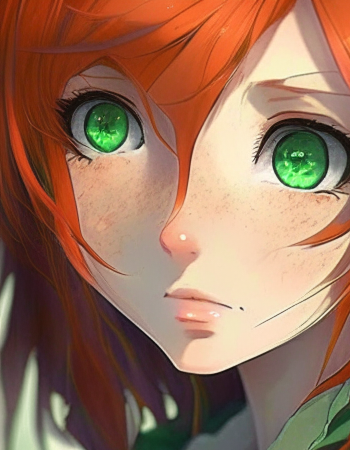

In [13]:
height = 450
width = 350

images = model.generate_text2img(
    prompt=prompt,
    num_steps=100,
    batch_size=1,
    guidance_scale=4,
    h=height,
    w=width,
    sampler="p_sampler",
    prior_cf_scale=4,
    prior_steps="5",
)
default_image = images[0]
default_image.show()

### Используем полученное изображение и сгенерируем разные эмоции

In [14]:
emotions = ['happy', 'sad', 'angry']
emotion_images = []

for emotion in emotions:
    image = model.generate_img2img(
        prompt=emotion+' '+prompt,
        pil_img=default_image,
        num_steps=100,
        batch_size=1,
        guidance_scale=4,
        sampler="p_sampler",
        prior_cf_scale=4,
        prior_steps="5",
    )[0]
    emotion_images.append(image)

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:01<00:00, 16.05it/s]


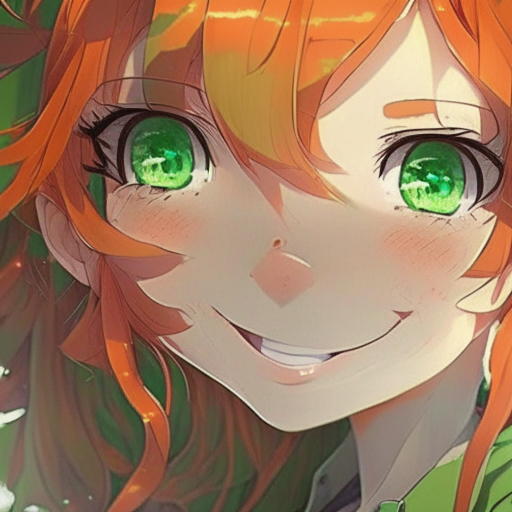

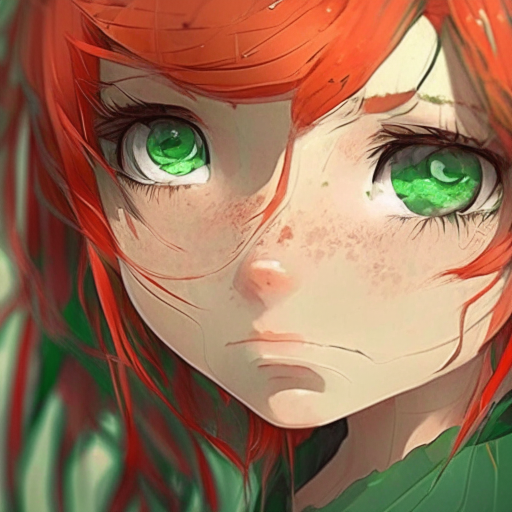

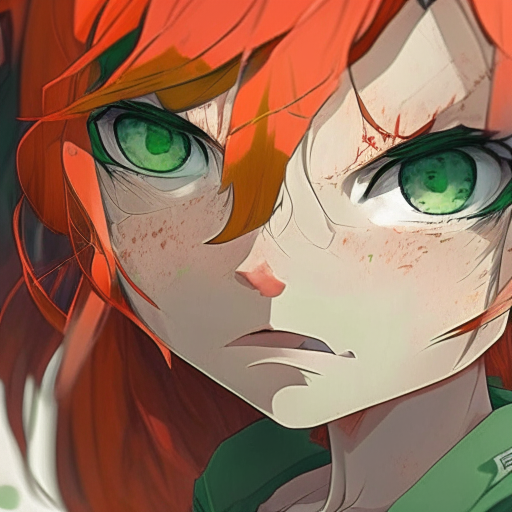

In [15]:
for image in emotion_images:
    image.show()